# 11-Topic Model of the Constantine Beys Corpus


In the first chapter of Visualizing History's Fragments, I use a hierarchical topic model to interrogate the ways in which three nineteenth-century French settler authors perceived and presented the histories of the Ottoman governors in Constantine, Algeria. The anti-Arab and/or anti-Turkish sentiments one might expect to observe in such accounts were absent, but a latent anti-Semitic sentiment appeared in the more granular models. This finding invites us to consider whether the model has uncovered authorial bias and/or anti-Jewish biases that operated at different moments in Ottoman Algeria. Close reading suggests that it is both. For instance, one of the most effective and revered governors, Salah Bey (r. 1771-1792), was responsible for instituting the first (as far as I can tell) ghettoization policy in Constantine, displacing families scattered throughout the city, and relocating them on undesirable lands. Each of the three authors recounts the brutal experiences of these families in starkly different ways. The casualness with which one author described this forced relocation evinces a complete lack of awareness of the violence of such a policy and its implications for individuals and families. The second author went further and portrayed it as mutually satisfactory(!), and the third, writing at the end of the nineteenth century, forgoes such glossing, instead pointing out that Constantinian Jews were thenceforth forbidden from living in any other quarter. [I'm interested in both the history and effects of this policy, as well as the ways in which it has been presented in the French and, if I can find it, Arabic historiography.]



## Experimental Visualizations

In [1]:
import pandas as pd

oa11_topics = pd.Cov = pd.read_csv("/Users/asg/mallet/output/OA-model/oa11-keys.csv", sep=',', names=["topic_number", "topic_weight", "top_words"])

oa11_topics.style.set_properties(subset=['top_words'], **{'width': '600px'})

,topic_number,topic_weight,top_words
0,0,0.17364,dey janissaires région gana troupes milice mokrani kaïd hadj chaouchs sud remplacé makhzen sultan khalifa biens ouled alger négociations cours
1,1,0.14343,tunis algériens l’armée tunisie tunisiens kef troupes algérienne tunisiennes tunisien siège défaite tunisienne mohammed-bey bach-agha algériennes hassein-bey défense frontière l’année
2,2,0.02868,tribu touggourt zmala pont servir espagnols medersa arches règlement marabout terres batterie travaux espagnole prophète d’eau réformes qu’elle constitua étudiants
3,3,0.06513,l’usurpateur bach-agha dieu chaouch habitants dar-el-bey crainte goums maison traître firent joie agha projets annoncer balles l’agha chaouche craindre résolus
4,4,0.11219,france français bastion calle française agents consul peste duc comptoirs el-ouznadji octobre ferhat-bey ingliz stora livrer accords roi reïs intérêts
5,5,0.14901,dey henanecha région puis nommé sud colonne kabiles situation ferdjioua famille enfin daouaouida indigènes révolte kasba yoldach contingents ben-gana grand
6,6,1.63793,bey qu’il ville faire d’une pacha alger temps d’alger mort d’un province fils troupes dey turcs tête camp c’est nouveau
7,7,0.13608,khalifa makhzen braham caïd-dar membres destitution aller agha-ed-deïra composition vides cruel juifs plaintes prison d’ailleurs finances arrêter faible souf chute
8,8,0.13906,dieu l’année cheïkh l’hégire gouvernement beys sidi j.-c d’ali dizaine gouverneur mourut écrit bach-agha l’histoire siècle vrai mosquée régence s’est
9,9,0.02789,général rue bône ben-gana chef assiégés france feu brèche commandant l’armée place colonel batterie maréchal français bataillon batteries mansoura hommes


## Initial analysis of the topics and their meanings:

<ol>
    <li>Negotiations between the Ottomans & local tribes.</li>
    <li>Tunisian-Algerian Conflict</li>
    <li>Public works</li>
    <li>Internal political discord</li>
    <li>French concession at La Calle</li>
    <li>Tribal rebellions</li>
    <li>Leadership & transitions</li>
    <li><b>Malfeasance.</b> Notice the major difference between the formation of this topic in this model versus that of the 10-topic model. In the 11-topic model, this topic also includes "Jews" and "finances," suggesting a connection between them and negative connotation for both, given that other words in this topic include "crimes", "prison", "cruel", "plaintes", "faible", and "destitution."</li>
    <li>Islamic religious practices and their connection to governance (gouvernement, gouverneur, and bey)</li>
    <li>Battle of Constantine</li>
    <li>I think this topic might be a mashup or chimera of the 1816 bombardment of Algiers by the English Admiral and the cruelty of a couple of the beys (cruauté, crimes, despote)</li>
</ol>

In [2]:
# Create a list of topic labels.
labels = ['Ott-Tribe Negotiations', 'Tun-Alg Conflict','Public Works', 'Internal Discord', 'French Concess', 'Rebellions', 'Lead & Trans', 'Malfeasance', 'Religion & Gov', 'Battle of Con.', 'Eng Bomb_BadGov']

# Add the labels list as a new column to the dataframe
oa11_topics['labels'] = labels

# Adjust the style of the dataframe so that the column of top_words is wide enough to see all of them.
oa11_topics.style.set_properties(subset=['top_words'], **{'width': '500px'})

,topic_number,topic_weight,top_words,labels
0,0,0.17364,dey janissaires région gana troupes milice mokrani kaïd hadj chaouchs sud remplacé makhzen sultan khalifa biens ouled alger négociations cours,Ott-Tribe Negotiations
1,1,0.14343,tunis algériens l’armée tunisie tunisiens kef troupes algérienne tunisiennes tunisien siège défaite tunisienne mohammed-bey bach-agha algériennes hassein-bey défense frontière l’année,Tun-Alg Conflict
2,2,0.02868,tribu touggourt zmala pont servir espagnols medersa arches règlement marabout terres batterie travaux espagnole prophète d’eau réformes qu’elle constitua étudiants,Public Works
3,3,0.06513,l’usurpateur bach-agha dieu chaouch habitants dar-el-bey crainte goums maison traître firent joie agha projets annoncer balles l’agha chaouche craindre résolus,Internal Discord
4,4,0.11219,france français bastion calle française agents consul peste duc comptoirs el-ouznadji octobre ferhat-bey ingliz stora livrer accords roi reïs intérêts,French Concess
5,5,0.14901,dey henanecha région puis nommé sud colonne kabiles situation ferdjioua famille enfin daouaouida indigènes révolte kasba yoldach contingents ben-gana grand,Rebellions
6,6,1.63793,bey qu’il ville faire d’une pacha alger temps d’alger mort d’un province fils troupes dey turcs tête camp c’est nouveau,Lead & Trans
7,7,0.13608,khalifa makhzen braham caïd-dar membres destitution aller agha-ed-deïra composition vides cruel juifs plaintes prison d’ailleurs finances arrêter faible souf chute,Malfeasance
8,8,0.13906,dieu l’année cheïkh l’hégire gouvernement beys sidi j.-c d’ali dizaine gouverneur mourut écrit bach-agha l’histoire siècle vrai mosquée régence s’est,Religion & Gov
9,9,0.02789,général rue bône ben-gana chef assiégés france feu brèche commandant l’armée place colonel batterie maréchal français bataillon batteries mansoura hommes,Battle of Con.


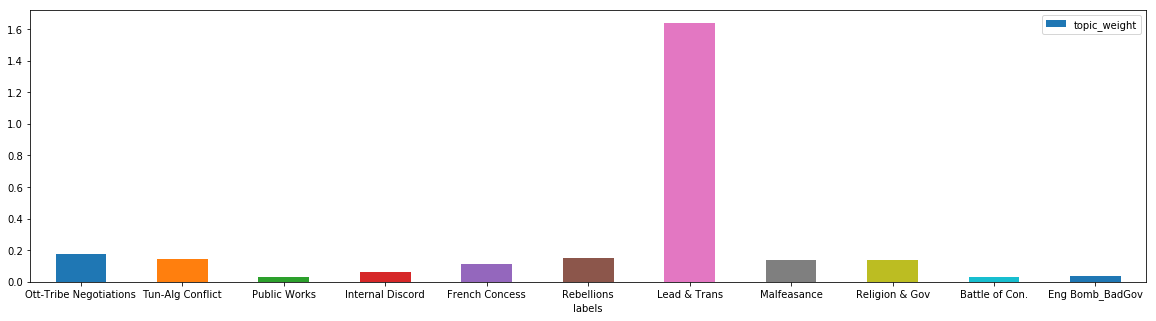

In [3]:
# Represent the weights of the topics as a simple bar chart, using the author-created topic labels. 

topic_bar = oa11_topics.plot.bar(x='labels', y='topic_weight', rot=0, figsize=(20,5))

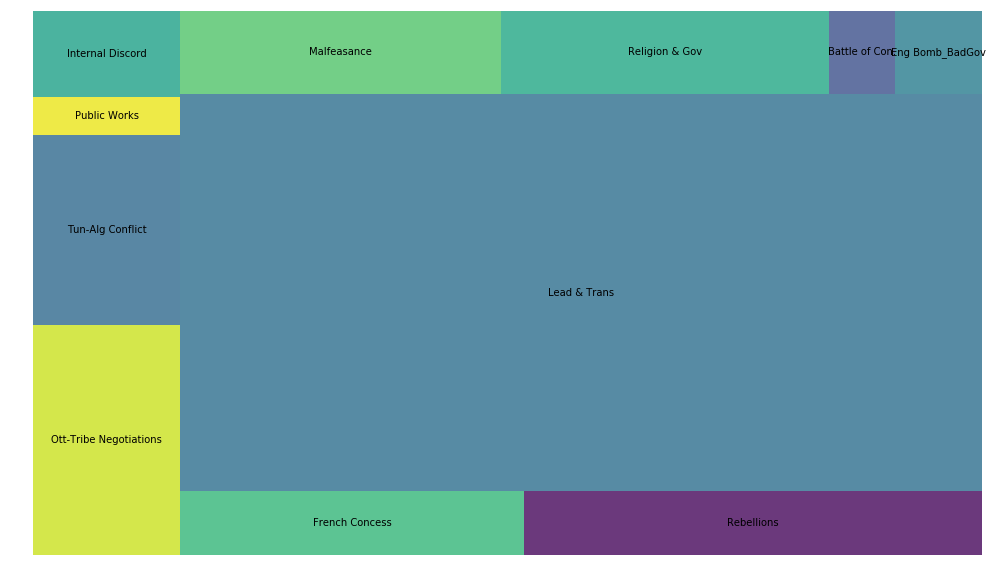

In [4]:
#! pip3 install squarify
import matplotlib.pyplot as plt
import squarify

plt.rcParams['figure.figsize'] = (17.0, 10.0)

squarify.plot(sizes=oa11_topics['topic_weight'], label=oa11_topics['labels'], alpha=.8)
plt.axis('off')
plt.show()

In [5]:
# The mallet .txt doc-topics output file was converted to a csv, and the columns for 
# document numbers and filepaths were deleted in advance of reading the csv into a 
# pandas dataframe. Be sure to convert the columns to number data type with ~6 decimal places to remove the 
# exponential format. Also, add a new line at the top of the csv with the labels defined in the previous step.

oa11_docs = pd.Cov = pd.read_csv("/Users/asg/mallet/output/OA-model/oa11-doc-topics.csv", sep=',')

# Uncomment the following line to view the top of the dataframe
oa11_docs.head()

,Ott-Tribe Negotiations,Tun-Alg Conflict,Public Works,Internal Discord,French Concess,Rebellions,Lead & Trans,Malfeasance,Religion & Gov,Battle of Con.,Eng Bomb_BadGov
0,0.412960,0.185284,0.000047,0.000107,0.000184,0.003519,0.397344,0.000223,0.000228,0.000046,0.000060
1,0.037344,0.030846,0.006168,0.014008,0.024128,0.032047,0.567327,0.029267,0.244972,0.005998,0.007896
2,0.008837,0.109082,0.001460,0.003315,0.005709,0.160257,0.694051,0.006925,0.007077,0.001419,0.001868
3,0.164294,0.059149,0.000089,0.000201,0.046693,0.000460,0.471615,0.000420,0.256880,0.000086,0.000113
4,0.380718,0.263404,0.000091,0.000206,0.000355,0.000472,0.353677,0.000431,0.000441,0.000088,0.000116


ModuleNotFoundError: No module named 'numpy.core._multiarray_umath'

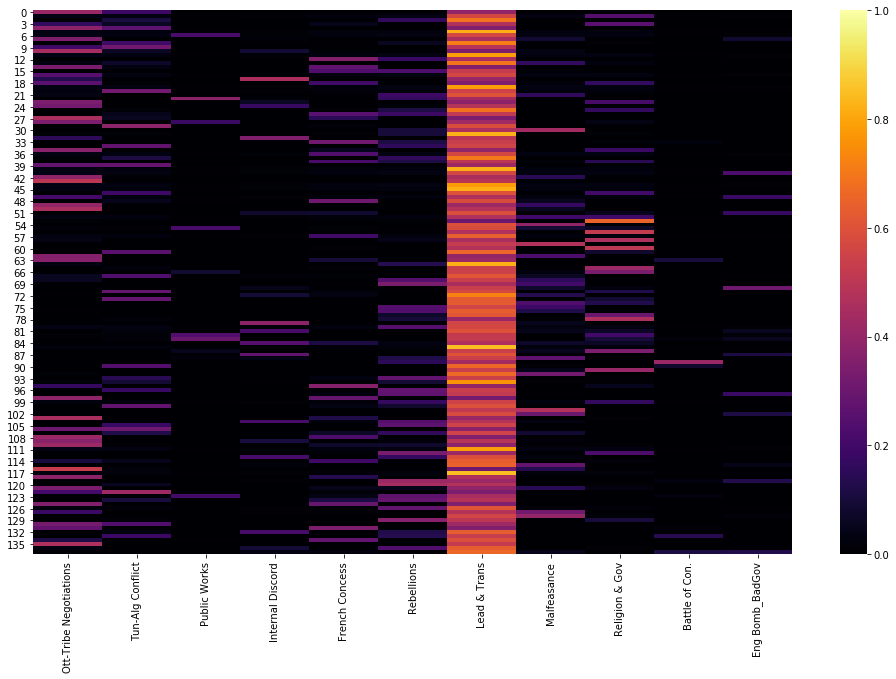

In [6]:
# Represent the topic weights in each document as a heatmap.

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

plt.rcParams['figure.figsize'] = (17.0, 10.0)

oa11_docs = oa11_docs[oa11_docs.columns].astype(float)

# Create a heatmap that is visually accessible (see https://matplotlib.org/tutorials/colors/colormaps.html)
# using the 'inferno' colormap. 

sns.heatmap(oa11_docs, cmap='inferno', vmin=0.0, vmax=1.0)

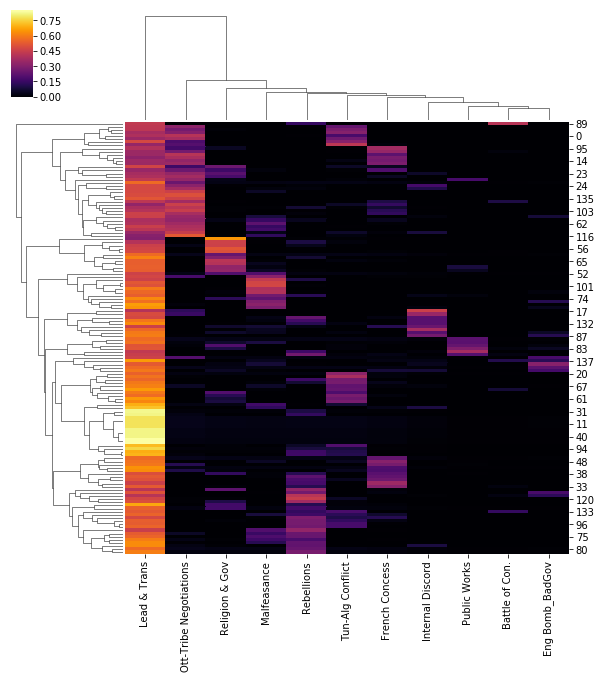

In [7]:
# Create a hierarchical heatmap using seaborn's "clustermap" method with default settings.
# By default this method will cluster by both rows and columns, which is what is most useful for this data.

sns.clustermap(oa11_docs, cmap='inferno')

<br></br>

### Analysis of the Clustered Heat Map

All of the documents describe issues of leadership and transitions in power from one governor to the next, which is not surprising, given that the corpus consists of gubernatorial chronicles. What is more interesting is the lack of overlap across topics. Apart from the first topic, if a document is also about, say religion and government, it is unlikely to also discuss at any great length any of the other topics with only a few notable exceptions. Documents that describe negotiations between the Ottoman and local Algerian tribes may also contain information about the French concessions, the Tunisian-Algerian border conflict, and to a much lesser extent religion or malfeasance. Surprisingly, the topics Ottoman-Tribal Negotiations and Rebellions do not overlap, which suggests that perhaps the former may be mis-labeled. It is worth revisiting this topic after doing a close reading of some of the documents most closely related to this topic. Rebellions has an intriguing overlap with the French concessions topic, which suggests a relationship between them. From my close reading, I know that the Constantinois rebelled against Algiers' decision to revoke the French concessions and transfer them to the British after the Constantinois had spent decades establishing trusting relationships with the French. The conflict grew so heated that the Governor of Algiers ordered the Governor of Constantine, Abd-Allah, and his wife, Deikha, beaten to death. 

<br></br>


In [8]:
oa11_docs_fn = pd.Cov = pd.read_csv("/Users/asg/mallet/output/OA-model/oa11-doc-topics_filenames.csv", sep=',')

oa11_docs_fn.sort_values(['Malfeasance'], ascending=False).head(10)

,DocNames,Ott-Tribe Negotiations,Tun-Alg Conflict,Public Works,Internal Discord,French Concess,Rebellions,Lead & Trans,Malfeasance,Religion & Gov,Battle of Con.,Eng Bomb_BadGov
101,vay2002-09.txt,0.000604,0.000499,0.000100,0.000226,0.000390,0.007471,0.509779,0.480223,0.000483,0.000097,0.000128
59,mercier-13.txt,0.000420,0.000347,0.000069,0.000157,0.000271,0.000360,0.523723,0.474160,0.000336,0.000067,0.000089
30,gaid-30.txt,0.000698,0.000577,0.000115,0.000262,0.000451,0.101142,0.461042,0.434893,0.000559,0.000112,0.000148
128,vay2002-36.txt,0.000195,0.002404,0.000032,0.000073,0.000126,0.003532,0.560352,0.401656,0.013614,0.000031,0.017985
54,mercier-08.txt,0.000756,0.000625,0.000125,0.000284,0.000489,0.000649,0.599338,0.392494,0.004960,0.000121,0.000160
92,vay2002-00.txt,0.013773,0.000382,0.000076,0.000173,0.000299,0.000397,0.664550,0.319809,0.000370,0.000074,0.000098
127,vay2002-35.txt,0.180130,0.001115,0.000223,0.008279,0.008645,0.001158,0.479114,0.319753,0.001081,0.000217,0.000285
102,vay2002-10.txt,0.001646,0.000109,0.000022,0.000049,0.000085,0.000870,0.578986,0.299955,0.000105,0.000021,0.118151
115,vay2002-23.txt,0.000166,0.000137,0.000027,0.022971,0.000107,0.003006,0.646817,0.285531,0.000133,0.000027,0.041079
88,mercier-42.txt,0.000367,0.000303,0.019102,0.036105,0.000237,0.125143,0.540861,0.271102,0.006641,0.000059,0.000078


In [9]:
#There is a known bug when using the suggested method (IPython.display.IFrame) in Jupyter Notebooks, but
#the following code will actually render the desired iframe in notebooks without a problem.

import IPython
url = 'https://voyant-tools.org/?corpus=80d0e68d144f5d3bb792fb0ddb115833&view=Contexts&query=juif*&context=10'
iframe = '<iframe src=' + url + ' width=960 height=569></iframe>'
IPython.display.HTML(iframe)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


## References to Jews by Author and Governor


In [10]:
juifs = pd.read_csv("/users/asg/Dropbox/Scholarship/AhmedBey/Data-Copy/Beys-juifs-author_beys.csv", sep=',')
#juifs

### References to Jews by Authors

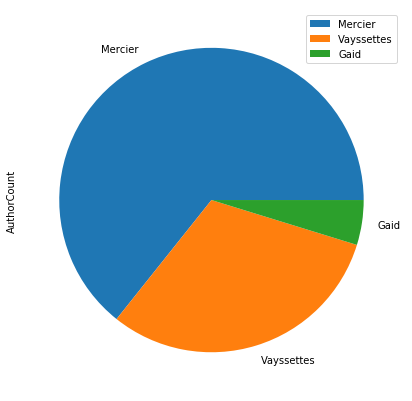

In [11]:
df = pd.DataFrame({'AuthorCount': [27, 13, 2]},
    index=['Mercier', 'Vayssettes', 'Gaid'])
plot = df.plot.pie(y='AuthorCount', figsize=(7, 7))

Despite Mercier's quantitative over-representation in raw numbers, it is worth pointing out that Mercier's is the longest text and therefore, statistically more likely to include a greater number of references to Jewish people. At the same time, the numbers do not tell the whole story. As will be shown below that just because Gaïd only refers to Jews twice, both references are made in highly, qualitatively negative contexts, thus demonstrating the importance of pairing close reading with computational methods to test hypotheses and investigate new questions that computational results prompt. 

### References to Jews by Governor

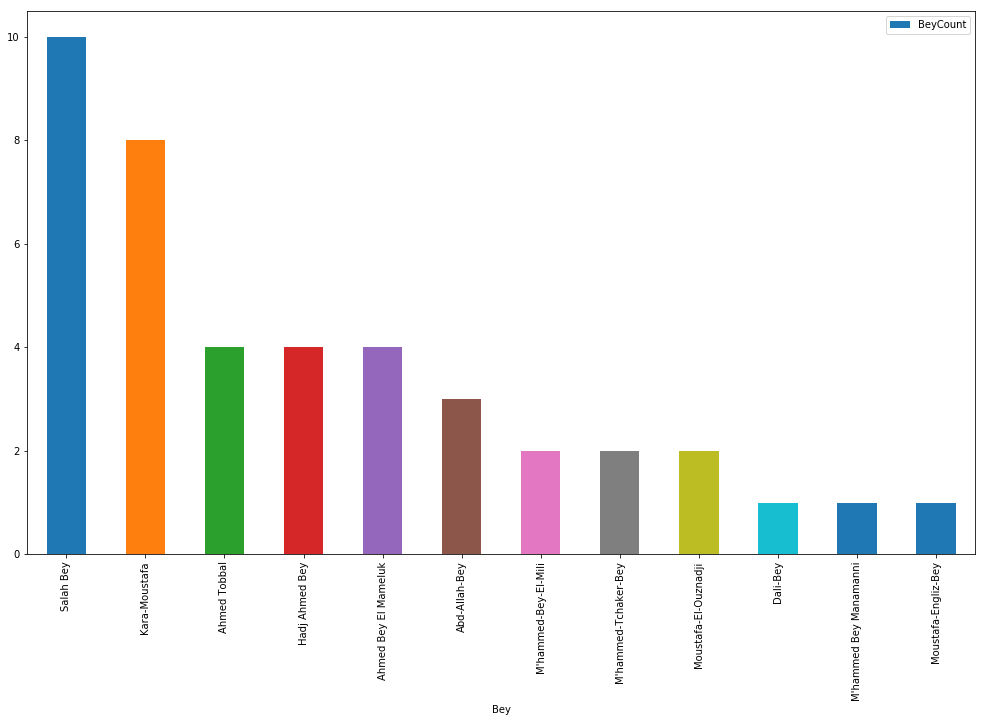

In [12]:
juifs_bey = juifs.plot.bar(x='Bey', y='BeyCount', rot=90)

## Analysis

<b>Question:</b> Is the anti-Semitic bias present evidence of authorial bias and/or biases that were operating in the historic moments of Constantinian history that they recount? 

This is a challenging question to answer and requires both close reading of the sources used to create the model, as well as comparisons with primary sources from different periods in Constantine's history and other French author's accounts of Algerian history. 

### Authors

The first noteworthy observation is that Mercier discusses the Jewish people of Constantine significantly more often than either Gaid or Vayssette. This does not necessarily mean that Mercier's portrayals are anti-Semitic, but it is worth noting the greater attention he pays to the Jews of Algeria. 

The only time Gaid mentions Jews (just twice), it is in highly negative contexts: the removal and sequestration of Jews to a single specific quarter in Constantine and the decapitation of a Jewish financier. So, although, numerically far fewer references to Jews are made in Gaid's work, they are qualitatively significant, given the context. 

>Il fit construire un palais pour donner plus d’espace à son harem et à ses nombreux serviteurs. Il s’agit de ce grand bâtiment qu’une rue sépare de la mosquée, et dont l’intérieur si riant, si gracieux, contraste si fort avec la sombre voûte qui y donne accès, et les hautes murailles percées de rares lucarnes grillées qui l’isolent des habitations voisines (40). Il céda aux Juifs les terrains qui s’étendent au delà, entre la porte d’El-Kantara et le ravin appelé quartier Charâ pour les regrouper dans un seul quartier alors qu’ils étaient disséminés dans tous les quartiers et particulièrement du côté de Bab-Djabia. (Gaid, document 25, Salah Bey).

>He built a palace to give more space to his harem and his many servants. It is about this big building which a street separates from the mosque, and whose interior so [agreeable], so graceful, contrasts so strongly with the dark vault which gives access to it, and the high walls pierced by rare grilled skylights which isolate it from neighboring dwellings (40). He ceded to the Jews the lands which extend beyond, between the gate of El-Kantara and the ravine called Charâ district to regroup them in a single district whereas they were disseminated in all the districts and particularly on the side of Bab-Djabia. 

Gaid moves on quickly from this statement to describe the schools that Salah Bey founded on land he bought from Aisha, the daughter of a former governor, Hossein Bey, known as Zereg Ainou. This suggests that author views this displacement of an entire group of people based on ethnicity as simply part of Salah Bey's "improvements" to the province, part of his modernization efforts that sought to create greater legibility and bureaucratic efficiency. The casualness with which this forced migration is described evinces a complete lack of awareness of the violence of such a policy and its implications for individuals and families. 

In the second instance, Gaid describes the brutal death of one of the Bacri brothers and Ben Duran, and that Hadj Ali-Pasha, then Governor in Algiers, visited the same fate on all who had dealings with them, no matter how small. In this case, the unfortunate Governor of Constantine, Ahmed Tobbal, was guilty of delivering three loads of wheat to the damned men, and was, himself, assassinated. 

>Mais Hadj-Ali-Pacha, coléreux et sanguinaire, soupçonneux et vindicatif, ne sut pas apprécier les services rendus par ses collaborateurs. Après avoir fait décapiter les Juifs Bacri et Ben Duran pour trafic illicite, il fit subir le même sort à tous ceux qui avaient eu des relations commerciales avec eux, soupçonnés de complicité, dont Ahmed Tobal qui leur avait livré, il y avait quelques temps trois chargements de blé. Mohamed Naâman Ben Ali lui succéda. (Gaid, document 35, Ahmed Tobbal).

>But Hadj-Ali-Pasha, angry and bloodthirsty, suspicious and vindictive, did not know how to appreciate the services rendered by his collaborators. After having beheaded the Jews Bacri and Ben Duran for illicit trafficking, he subjected the same fate to all those who had had commercial relations with them, suspected of complicity, including Ahmed Tobal who had delivered them, some time ago three loads of wheat. Mohamed Naâman Ben Ali succeeded him.

In this second reference in Gaïd's work, he recounts the brutal deaths of one of the Bacri brothers and Ben Duran by beheading at the behest of the Governor of Algiers, Hadj Ali Pasha. Gaïd describes this governor as "angry, bloodthirsty, suspicious, and vindictive," so it is not a flattering portrait of this man either. However, much as in the previous passage, Gaïd moves on after a summary accounting of these deaths without providing any context or the evidence presented against the men as proof of their alleged crimes. We don't know, in Gaïd's account, if Arabs, Berbers, and/or Europeans were punished in a similar brutal manner for related crimes. The incident is used as a way to highlight the cruelty of this particular Governor of Algiers and explain the death of Ahmed Tobbal, then Governor of Constantine and a "Turk by birth," according to Gaïd. Therefore, we know that neither ethnicity (Turkishness, at least) nor political office/prestige protected men from the caprice of Hadj Ali Pasha. 


Many of Mercier's references to Jews come from the same account/instance; he just used the word "Jew(s)" often in these instances. In the most extensive description of Salah Bey's treatment of the Jews in Constantine, Mercier follows Vayssette's account, but there is an important difference between the two accounts. Notice how each sums up the result of Salah Bey's Jewish relocation policy. Mercier comments that the "Jews ... were forbidden to stay elsewhere," whereas, Vayssettes whitewashes the harsh reality by commenting, "this is how the Jewish quarter was constituted to the great satisfaction of both" [presumably, Muslims and Jews]. Which is correct? 

<b>Mercier:</b>
>Salah-Bey set out to continue the work undertaken by his predecessors to rectify the viability of Constantine and provide this city with constructions worthy of the capital of an important province. ... Sidi-El-Kettani district. - A district had remained in its primitive state, covered with hovels inhabited, for the most part, by Jews; it is that of the current place Negrier and the houses which surround it. Salah-Bey chose [this location] to build his private home and endow it with various establishments. To this end, he bought back the particular properties, either of the Jews or of the Muslims, to which they belonged, and this by means of regular acts which still exist on the old registers. ... Jews parked in the Chara district. - The displacement of the inhabitants of this island led [Salah] to settle the question of the Jewish quarter. Until then, they were established all over the city, embarrassing and embarrassed by Muslims. The part of the city, currently crossed by rue Thiers, formed a ravine cut by holes and potholes and all crowded with ruins [and] miserable hovels. Salah-Bey had it leveled somewhat and assigned it as a special quarter for the Jews. They built a main street there, which formed Grand Street, as it was in its original state, and the adjacent alleys. The whole constituted the district known as Charâ, <b>assigned to the Jews and they were forbidden to stay elsewhere.</b>

<b>Vayssettes:</b> 
>The land that extends beyond, between the current handling, the gate of El-Kantara and the ravine, and which was called the Charâ district, offered the saddest and most desolate aspect. At the bottom you could only see a few houses of mediocre appearance, which had come to group around the mesdjed or oratories of Sidi-Seffar and Sidi-Tlemsani. The rest was completely deserted and showed only mounds and crevices. Such a neighborhood did not fit well with the sumptuousness of the buildings that Salah's hand had brought up nearby. He conceived the plan to change the appearance of these places, while having them used for the enlargement of the city. Until then the Jews had remained a little scattered in all the districts and particularly on the side of Bab-el-Djabia, where they were too mixed with the Moslem population. He granted them all these lands, on the condition that they would build houses there, and <b>this is how the Jewish quarter was constituted, to the great satisfaction of both.</b>

What Gaïd passes over in one brief sentence was part of a much larger project on the part of Salah Bey, which Mercier, to some extent at least, recognizes the disenfranchisement inherent in ghettoization policies. 

<br></br>
### Governors
Similar to the caveat about Mercier, it is worth noting that Salah Bey was one of the longest serving and most influential governors, about whom much is written, so it is not that surprising to find the most references to Jews in chronicles about this governor. At the same time, it is again worthwhile to delve into the qualitative differences between these references and those found in the chronicles for other governors. 

<br></br>

## Visualizing Mallet output with pyLDAvis
You will need to generate MALLET's output-topic-states <b>gz</b> file to prepare the MALLET output in the format needed by pyLDAvis. I didn't know about this possibility, so I had to run MALLET again, creating a different 5-topic model than the ones visualized above. 

Huge thanks to <a href="https://jeriwieringa.com/about/">Jeri E. Wieringa</a> for making this connection and sharing all of the code! You can find her explanation and code at <a href="https://jeriwieringa.com/2018/07/17/pyLDAviz-and-Mallet/">"Using pyLDAvis with Mallet."</a>

In [13]:
import pandas as pd
import gzip
import os

dataDir = "/Users/asg/mallet/output/OA-model/"

def extract_params(statefile):
    """Extract the alpha and beta values from the statefile. 
    
    Args:
        statefile (str): Path to the statefile produced by Mallet.
    Returns:
        tuple: alpha (list), beta
    """
    with gzip.open(statefile, 'r') as state:
        params = [x.decode('utf-8').strip() for x in state.readlines()[1:3]]
    return (list(params[0].split(":")[1].split(" ")), float(params[1].split(":")[1]))

def state_to_df(statefile):
    """Transform state file into pandas dataframe. 
    The Mallet statefile is tab-separated, and the first two rows contain the alpha and beta hyperparameters.
    
    Args:
        statefile (str): Path to statefile produced by Mallet.
    Returns:
        dataframe: topic assignment for each token in each document of the model
    """
    return pd.read_csv(statefile,
                      compression='gzip',
                      sep=' ',
                      skiprows=[1,2]
                      )

In [14]:
params = extract_params(os.path.join(dataDir, 'oa10-topic-state.gz'))

alpha = [float(x) for x in params[0][1:]]
beta = params[1]
print("{}, {}".format(alpha, beta))

df = state_to_df(os.path.join(dataDir, 'oa11-topic-state.gz'))

[0.04497921727042979, 0.22174612331892826, 0.0757644476894436, 0.13135124607342147, 0.023015933795246187, 1.7315284441165957, 0.07948921428038187, 0.17812207030422753, 0.16743616370306638, 0.16442228962390776], 0.11802529423346594


In [15]:
# Define column 'type' as a string to avoid nan pandas errors.
df['type'] = df.type.astype(str)

# Preview the dataframe from the statefile, which will then be used to generate the data needed for the 
# LDAvis library. 
df[:4]

,#doc,source,pos,typeindex,type,topic
0,0,data/OttAlg/gaid-36.txt,0,0,naaman-bey,6
1,0,data/OttAlg/gaid-36.txt,1,1,mai,6
2,0,data/OttAlg/gaid-36.txt,2,2,turc,6
3,0,data/OttAlg/gaid-36.txt,3,3,naissance,6


<b>Step 1:</b> We need the length of the documents. To do this, Jeri grouped the data by document id and counted the tokens in the doc. This data is then sorted by the doc id, so it will be in the correct order for visualization pre-processing.

In [16]:
# Get document lengths from statefile.
docs = df.groupby('#doc')['type'].count().reset_index(name='doc_length')

# Preview the gathered & grouped data:
docs[:4]

,#doc,doc_length
0,0,608
1,1,2
2,2,17
3,3,321


<b>Step 2:</b> We need the voabulary and frequencies. Jeri used pandas to generate a new frame with the word counts. She then sorted this df so that it is alphabetical by type, a step that will need to be repeated when creating the topic-term matrix because the order matters and must be kept consistent. Just as in Jeri's example, I, too, have OCR errors (see the first entry in the vocab dataframe above).

In [17]:
# Get vocab and term frequencies from the statefile.
vocab = df['type'].value_counts().reset_index()
vocab.columns = ['type', 'term_freq']
vocab = vocab.sort_values(by='type', ascending=True)

# Preview the resulting dataframe
vocab[:4]

,type,term_freq
12708,a*tes,1
16586,a-t-elle,1
4901,a-t-il,3
6575,abaissement,2


<b>Step 3:</b> Create matrix files. The values need to be smoothed and the data normalized so that each row sums to 1. Jeri used sklearn to handle large matrices efficiently. 

In [18]:
# Topic-term matrix from state file.

import sklearn.preprocessing

def pivot_and_smooth(df, smooth_value, rows_variable, cols_variable, values_variable):
    """
    Turns the pandas dataframe into a data matrix.
    Args:
        df (dataframe): aggregated dataframe
        smooth_value (float): value to add to the matrix to account for the priors
        rows_variable (str): name of dataframe row to use as the rows in the matrix
        cols_variable (str): name of dataframe column to use as the columns in the matrix
        values_variable (str): name of the dataframe column to use as the values in the matrix
    Returns:
        dataframe: pandas matrix that has been normalized on the rows
    """
    matrix = df.pivot(index=rows_variable, columns=cols_variable, values=values_variable).fillna(value=0)
    matrix = matrix.values #for models with more than 10 toipcs, remove the smoothing values, which otherwise cause a value error in step 5.
    normed = sklearn.preprocessing.normalize(matrix, norm='l1', axis=1)
    return pd.DataFrame(normed)

<b>Step 4:</b> [From Jeri's post] Next, we need to aggregate the data from the statefile dataframe to get the nmber of topic assignments for words in the documents. For <b>phi</b>, the topic-term matrix, [she] aggregated by topic and word, counted the number of times each word was assigned to each topic, and then sorted the resulting dataframe alphabetically by word, so that it matches the order of the vocabulary frame. Here, [she] used the <b>beta</b> hyperparameter as the smoothing value.

In [19]:
phi_df = df.groupby(['topic', 'type'])['type'].count().reset_index(name ='token_count')
phi_df = phi_df.sort_values(by='type', ascending=True)

phi_df[:10]

phi = pivot_and_smooth(phi_df, beta, 'topic', 'type', 'token_count')

phi[:10]

,0,1,2,3,4,5,6,7,8,9,...,16844,16845,16846,16847,16848,16849,16850,16851,16852,16853
0,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000456,0.000000,0.000000,0.00000
1,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.000000,0.000279,0.000000,0.000000,0.0000,0.000000,0.000000,0.000279,0.00000
2,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.00000
3,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.000000,0.000000,0.000399,0.000399,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000399,0.00000
4,0.000000,0.000000,0.000000,0.0000,0.000000,0.00038,0.000380,0.000000,0.000000,0.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.00038
5,0.000000,0.000000,0.000000,0.0003,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0003,0.000000,0.000000,0.000000,0.000000,0.0003,0.000000,0.000000,0.000000,0.00000
6,0.000000,0.000000,0.000072,0.0000,0.000024,0.00000,0.000024,0.000169,0.000000,0.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000072,0.000000,0.00000
7,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.000000,0.000273,0.000000,0.000000,...,0.0000,0.000000,0.000000,0.000273,0.000273,0.0000,0.000000,0.000000,0.000000,0.00000
8,0.000286,0.000286,0.000000,0.0000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.001428,0.000571,0.00000
9,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.000187,0.000000,0.000000,0.000000,...,0.0000,0.000187,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.00000


<b>Step 5:</b> We do the same thing again, but focused on the documents and topics (rather than words & topics) to generate the <b>theta</b> document-topic matrix. Here, <b>alpha</b> is used as the smoothing value.

In [20]:
theta_df = df.groupby(['#doc', 'topic'])['topic'].count().reset_index(name ='topic_count')

theta_df[:10]

theta = pivot_and_smooth(theta_df, alpha, '#doc', 'topic', 'topic_count')

theta[:10]

,0,1,2,3,4,5,6,7,8,9,10
0,0.414474,0.185855,0.0,0.000000,0.000000,0.003289,0.396382,0.000000,0.000000,0.0,0.000000
1,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.500000,0.000000,0.500000,0.0,0.000000
2,0.000000,0.117647,0.0,0.000000,0.000000,0.176471,0.705882,0.000000,0.000000,0.0,0.000000
3,0.165109,0.059190,0.0,0.000000,0.046729,0.000000,0.470405,0.000000,0.258567,0.0,0.000000
4,0.383387,0.265176,0.0,0.000000,0.000000,0.000000,0.351438,0.000000,0.000000,0.0,0.000000
5,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000
6,0.000000,0.000000,0.5,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.0,0.000000
7,0.348404,0.000000,0.0,0.017287,0.000000,0.000000,0.458112,0.089761,0.000665,0.0,0.085771
8,0.000000,0.201058,0.0,0.005291,0.005291,0.058201,0.719577,0.000000,0.010582,0.0,0.000000
9,0.192037,0.316159,0.0,0.000000,0.004684,0.000000,0.484778,0.000000,0.002342,0.0,0.000000


The above processing steps represent about 90% of the work needed to prepare the mallet data for visualization with the LDAvis library. Now that all of the data has been formatted for pyLDAvis, we can queue it up and pass it to the visualization library.

In [21]:
import pyLDAvis

data = {'topic_term_dists': phi,
        'doc_topic_dists': theta,
        'doc_lengths': list(docs['doc_length']),
        'vocab': list(vocab['type']),
        'term_frequency': list(vocab['term_freq'])
}

vis_data = pyLDAvis.prepare(**data)

pyLDAvis.display(vis_data)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pyLDAvis/_prepare.py:223: RuntimeWarning: divide by zero encountered in log
  kernel = (topic_given_term * np.log((topic_given_term.T / topic_proportion).T))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pyLDAvis/_prepare.py:240: RuntimeWarning: divide by zero encountered in log
  log_lift = np.log(topic_term_dists / term_proportion)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pyLDAvis/_prepare.py:241: RuntimeWarning: divide by zero encountered in log
  log_ttd = np.log(topic_term_dists)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.


## Concordance of References to Jews in the Corpus

<table>
	<thead>
		<tr>
			<td> </td>
			<td>Document</td>
			<td>Left</td>
			<td>Term</td>
			<td>Right</td>
		</tr>
	</thead>
	<tbody>
		<tr>
			<td>undefined</td>
			<td>25</td>
			<td>nombreux serviteurs. Il s’agit de ce grand
         bâtiment qu’une rue sépare de la mosquée, et dont l’intérieur si riant, si gracieux,
         contraste si fort avec la sombre voûte qui y donne accès, et les hautes murailles
         percées de rares lucarnes grillées qui l’isolent des habitations voisines (40). Il
         céda aux </td>
			<td>juifs</td>
			<td> les terrains qui s’étendent au delà, entre la porte d’El-Kantara et
         le ravin appelé quartier Charâ pour les regrouper dans un seul quartier alors qu’ils
         étaient disséminés dans tous les quartiers et particulièrement du côté de Bab-Djabia.
         Il fit édifier en 1789, une autre médersa auprès de la</td>
		</tr>
		<tr>
			<td>undefined</td>
			<td>35</td>
			<td>et l’obéissance désirées. Au bout de deux années
         d'administration, ses finances lui permirent de présenter au pacha un denouche des
         plus flatteurs (17 mai 1810). Mais Hadj-Ali-Pacha, coléreux et sanguinaire, soupçonneux
         et vindicatif, ne sut pas apprécier les services rendus par ses collaborateurs. Après
         avoir fait décapiter les </td>
			<td>juifs</td>
			<td> Bacri et Ben Duran pour trafic illicite, il fit subir
         le même sort à tous ceux qui avaient eu des relations commerciales avec eux, soupçonnés
         de complicité, dont Ahmed Tobal qui leur avait livré, il y avait quelques temps trois
         chargements de blé. Mohamed Naâman Ben Ali lui succéda</td>
		</tr>
		<tr>
			<td>undefined</td>
			<td>55</td>
			<td>Arabes de l’intérieur de
         la Tunisie, tels que les Oulad-Bellil et les Oulad-Saïd, tellement poursuivis, traqués
         et châtiés un demi-siècle auparavant, par Mohammed-Pacha, aïeul des compétiteurs,
         que, s’il faut en croire El-Kairouani, ils en étaient arrivés à cacher leur origine
         et « se seraient plutôt dits </td>
			<td>juifs</td>
			<td> que d’avouer la vérité », ces Arabes et les grandes
         tribus de la partie orientale de la province de Constantine, relevèrent la tête, en
         soutenant Ali-Bey, et recommencèrent leurs déprédations. « Us se livrèrent à tous
         les excès dans le « pays, dit le même auteur, interceptèrent les commute nications
         et gênèrent</td>
		</tr>
		<tr>
			<td>undefined</td>
			<td>71</td>
			<td>logique. En effet, le départ de l’armée assiégeante fut encore l’occasion de nouveaux
         désastres. Elle s’embourba dans les marais de Meggarine et eut beaucoup de peine â
         s'en tirer, en abandonnant une partie de ses bagages et deux canons. Selon une tradition
         locale, ces canons fondus plus tard par un </td>
			<td>juif</td>
			<td>, du nom de Ben-Berika,servirent â
         faire des bracelets commémoratifs du siège. Succès politiques de Salah-Bey dans le
         Sahara, — L’échec de Salah-Bey fut donc complet pour le moment; mais ce prince ne
         tarda pas à prendre sa revanche, favorisé, cette fois, par les circonstances. Peu
         après, en</td>
		</tr>
		<tr>
			<td>undefined</td>
			<td>71</td>
			<td>Bey
         s’appliqua â continuer l’œuvre entreprise par ses prédécesseurs, pour rectifier la
         viabilité de Constantine et doter cette ville de constructions dignes du chef-lieu
         d’une province importante. Quartier de Sidi-El-Kettani. — Un quartier était demeuré
         dans son état primitif, couvert de masures habitées, en grande partie, par des </td>
			<td>juifs</td>
			<td>;
         c’est celui de la place Négrier actuelle et des maisons qui l’environnent. Salah-Bey
         le choisit pour y construire sa demeure . particulière et le doter d’établissements
         divers. Il racheta, à cet effet, les propriétés particulières, soit aux Juifs, soit
         aux Musulmans, auxquels elles appartenaient et cela au moyen d’actes réguliers</td>
		</tr>
		<tr>
			<td>undefined</td>
			<td>71</td>
			<td>son état primitif, couvert de masures habitées, en grande partie, par des Juifs;
         c’est celui de la place Négrier actuelle et des maisons qui l’environnent. Salah-Bey
         le choisit pour y construire sa demeure . particulière et le doter d’établissements
         divers. Il racheta, à cet effet, les propriétés particulières, soit aux </td>
			<td>juifs</td>
			<td>, soit
         aux Musulmans, auxquels elles appartenaient et cela au moyen d’actes réguliers qui
         existent encore sur les vieux registres. Au centre de ce pâté informe de maisons,
         se trouvait le tombeau d’un saint personnage, Sidi-El-Kettani. Le bey commença par
         lui édifier une fort belle mosquée, dont le corps</td>
		</tr>
		<tr>
			<td>undefined</td>
			<td>71</td>
			<td>pour la Mosquée, des matériaux précieux et le minbar, ou chaire
         en marbre polychrome, qui fut préparé à Livourne et monté sur place par des ouvriers
         venus dans ce but. De belles faïences, des colonnes de marbre, sans doute de même
         origine, furent aussi placées dans sa grande maison. Les </td>
			<td>juifs</td>
			<td> parqués dans le quartier
         de Char a. — Le déplacement des habitants de cet ilôt, l’amena à régler la question
         du quartier juif. Jusqu’alors, ils étaient établis un peu partout dans la ville, gênant
         les Musulmans et gênés par eux. La partie de la ville, traversée actuellement par
         la rue Thiers</td>
		</tr>
		<tr>
			<td>undefined</td>
			<td>71</td>
			<td>place par des ouvriers
         venus dans ce but. De belles faïences, des colonnes de marbre, sans doute de même
         origine, furent aussi placées dans sa grande maison. Les Juifs parqués dans le quartier
         de Char a. — Le déplacement des habitants de cet ilôt, l’amena à régler la question
         du quartier </td>
			<td>juif</td>
			<td>. Jusqu’alors, ils étaient établis un peu partout dans la ville, gênant
         les Musulmans et gênés par eux. La partie de la ville, traversée actuellement par
         la rue Thiers, formait un ravin coupé par des trous et des fondrières et tout encombré
         de ruines, avec quelques misérables masures. Salah-Bey le</td>
		</tr>
		<tr>
			<td>undefined</td>
			<td>71</td>
			<td>gênant
         les Musulmans et gênés par eux. La partie de la ville, traversée actuellement par
         la rue Thiers, formait un ravin coupé par des trous et des fondrières et tout encombré
         de ruines, avec quelques misérables masures. Salah-Bey le fit quelque peu niveler
         et l’assigna comme quartier spécial aux </td>
			<td>juifs</td>
			<td>. Ceux-ci y construisirent une rue principale,
         qui a formé la rue Grand, telle qu’elle était dans son état primitif, et les ruelles
         adjacentes. Le tout constitua le quartier dit de ChaTâ, affecté aux Juifs et il leur
         fut défendu de se loger ailleurs. Les Medraça de Sidi-El-Kettani</td>
		</tr>
		<tr>
			<td>undefined</td>
			<td>71</td>
			<td>misérables masures. Salah-Bey le fit quelque peu niveler
         et l’assigna comme quartier spécial aux Juifs. Ceux-ci y construisirent une rue principale,
         qui a formé la rue Grand, telle qu’elle était dans son état primitif, et les ruelles
         adjacentes. Le tout constitua le quartier dit de ChaTâ, affecté aux </td>
			<td>juifs</td>
			<td> et il leur
         fut défendu de se loger ailleurs. Les Medraça de Sidi-El-Kettani et de Sidi-Lakhdar.
         — La medraça de Sidi-El-Kettani n’étant pas suffisante pour le nombre des étudiants,
         Salah en fit construire et approprier, en 1789, une autre, annexée à la mosquée de
         Sidi-Lakhdar</td>
		</tr>
		<tr>
			<td>undefined</td>
			<td>74</td>
			<td>Bey, à la défense d’Alger, en 1775, et contribué
         à la défaite des Espagnols. Destitué, en même temps que son collègue, il avait échappé
         à la mort en se réfugiant dans la mosquée de Sidi-Abd-Er-Rahmane, près d’Alger. Puis,
         il avait obtenu son pardon, grâce à l’intervention des </td>
			<td>juifs</td>
			<td> Bakri et Busnach (Boudjenah),
         alors tout puissants à Alger et exerçant, sur le dey, une influence absolue. Moustafa
         était un Turc, natif d’Alger et ne manquant pas de qualités guerrières et administratives;
         mais il était déjà avancé en âge et arrivait au pouvoir comme créature des Bakri et
         Busnach et</td>
		</tr>
		<tr>
			<td>undefined</td>
			<td>74</td>
			<td>Hadj-Hameida,
         en qualité de bach-Kateb, et confia la haute fonction de khalifa à un de ses compatriotes,
         Hadj-Moustafa, connu sous le nom d’Engliz.  Le bey interdit le commerce avec la Compagnie
         Française. — Abandon du comptoir de Kollo. *— Un de ses premiers actes, dicté évidemment
         par ses protecteurs </td>
			<td>juifs</td>
			<td>, consista à gêner les opérations commerciales de la Compagnie
         Française qui venait de prendre le titre d'Agence d’Afrique; il interdit même, en
         dépit des traités en vigueur, de lui livrer des blés dont la France avait le plus
         grand besoin. Ces grains provenaient des impôts 75 en nature dont l’excédent</td>
		</tr>
		<tr>
			<td>undefined</td>
			<td>75</td>
			<td>à La Calle, pilla le comptoir, le ferma et arrêta tous
         les agents, y compris le directeur Peïron. Le 14 mai 1798 eut lieu, à Alger, la mort
         du vieux dey. Baba-Hassan. Il fut remplacé par son neveu, le khaznadji Moustafa, homme
         vulgaire, brutal et cupide. Son favori, le </td>
			<td>juif</td>
			<td> Busnach, devint le factotum du gouvernement
         d’Alger et c’est, sans doute, grâce à son intervention que le bey de Constantine,
         venu pour saluer son nouveau suzerain, reçut l’ordre de mettre en liberté Peïron et
         ses compagnons et de les laisser rouvrir le Bastion. Rupture de la Régence d'Alger
         avec la</td>
		</tr>
		<tr>
			<td>undefined</td>
			<td>77</td>
			<td>brûler, dans le port, le bateau du pirate. Révolte
         des Derkaoua dans les provinces d’Or an et d'Alger.— Bel-Ahrech attaque Bougie.— R
         est repoussé de partout. — Le 25 juin 1805, une révolte éclata à Alger à la suite
         du meurtre deBusnach, commis par un janissaire. Pendant plusieurs jours, les </td>
			<td>juifs</td>
			<td>
         furent massacrés et leurs maisons mises au pillage. Le 30, Ahmed, khodja-el-kheil,
         était élu dey, et Moustafa périssait sous le fer de ses soldats. Depuis le printemps,
         la province d’Oran était le théâtre de la révolte des Derkaoua, qui avaient poussé
         l’audace jusqu'à venir assiéger le cheflieu. L’insurrection</td>
		</tr>
		<tr>
			<td>undefined</td>
			<td>81</td>
			<td>mois, après lesquels le dey fut étranglé par ceux qui l’avaient
         élevé au pouvoir. Après diverses péripéties, le choix de la Milice se porta sur le
         khodjet-el-kheil, El-Hadj-Ali, vieillard cruel, adonné à l’opium, et Alger fut de
         nouveau ensanglantée par les supplices de ses victimes; les </td>
			<td>juifs</td>
			<td> Bakri et Busnach,
         frappés des premiers, expièrent la faveur dont ils avaient joui naguère. Ahmed-Tobbal
         est mis à mort. — Cependant, à Constantine, le nouveau bey était parvenu à remettre
         tout en ordre. C’était un homme actif, ferme et prudent, sous l’autorité duquel les
         honnêtes gens reprenaient confiance. Les tributs</td>
		</tr>
		<tr>
			<td>undefined</td>
			<td>83</td>
			<td>au despote, le caïd alla lui rendre visite, un certain soir, et le trouva en nombreuse
         compagnie ; après avoir causé amicalement avec lui, le bey le congédia*, mais à peine
         le malheureux vieillard était-il sorti de l’appartement, qu’il se voyait arrêté par
         le caïd Kasba, assisté de deux exécuteurs </td>
			<td>juifs</td>
			<td>, qui l’étranglèrent et le suspendirent
         à la grille d’une fenêtre, afin que le public pût l’apercevoir le lendemain. En même
         temps, des agents se rendaient à sa demeure, arrêtaient ses parents et saisissaient
         tous ses biens; enfin, une troupe allait rapidement piller les douars soumis à son
         autorité. Puis ce</td>
		</tr>
		<tr>
			<td>undefined</td>
			<td>84</td>
			<td>pas la stupeur générale, lorsqu’on
         s’aperçut que le nouveau bey ne valait guère mieux que l’ancien. Négligeant tous ses
         devoirs gouvernementaux, pour se livrer aux vices les plus honteux ; Kara-Moustafa
         passait son temps dans la débauche, 14 décembre 1817, selon Ei-Guedj. entouré de gens
         sans mœurs, presque tous </td>
			<td>juifs</td>
			<td> et juives de ia plus basse extraction, qui servaient
         ses passions pour en tirer profit. A peine, dans l’intervalle de ses orgies, faisait-il
         acte d’autorité, pour ordonner une spoliation ou quelque supplice raffiné. Ce fut
         ainsi qu’ayant fait arrêter les fils Ben-El-Attar, appartenant à une bonne famille</td>
		</tr>
		<tr>
			<td>undefined</td>
			<td>84</td>
			<td>le patient dont le corps n’était qu’une plaie. Tout
         en se livrant à leur enquête, les commissaires, ' qui ne recevaient du bey aucun concours,
         apprirent les scandales de sa conduite privée et publique et s’empressèrent de le
         faire savoir au dey, en insistant sur la réprobation causée par l’arrogance des </td>
			<td>juifs</td>
			<td>
         sans mœurs, constituant la seule société de Kara-Moustafa. En apprenant ces nouvelles,
         Ali-Koudja prononça, aussitôt, la destitution de son indigne bey et envoya à ses délégués
         des ordres sévères pour mettre fin au scandale. Destitution et mise à mort de Kara-Moustafa.—Punition
         des juifs. — Ces instructions furent</td>
		</tr>
		<tr>
			<td>undefined</td>
			<td>84</td>
			<td>par l’arrogance des Juifs
         sans mœurs, constituant la seule société de Kara-Moustafa. En apprenant ces nouvelles,
         Ali-Koudja prononça, aussitôt, la destitution de son indigne bey et envoya à ses délégués
         des ordres sévères pour mettre fin au scandale. Destitution et mise à mort de Kara-Moustafa.—Punition
         des </td>
			<td>juifs</td>
			<td>. — Ces instructions furent ponctuellement exécutées : une troupe de soldats
         ayant pénétré dans le palais pour se saisir du bey, on le chercha de chambre en chambre,
         et on finit par le découvrir caché dans les combles. Arraché de son refuge, Kara-Moustafa
         fut aussitôt mis à mort (février 1818). Son</td>
		</tr>
		<tr>
			<td>undefined</td>
			<td>84</td>
			<td>chambre en chambre,
         et on finit par le découvrir caché dans les combles. Arraché de son refuge, Kara-Moustafa
         fut aussitôt mis à mort (février 1818). Son triste règne, si on peut lui donner ce
         nom, avait duré juste un mois. On procéda ensuite à l’arrestation d’un grand nombre
         de </td>
			<td>juifs</td>
			<td> et de juives compromis par leurs relations avec le bey, et leurs demeures
         furent livrées au pillage</td>
		</tr>
		<tr>
			<td>undefined</td>
			<td>86</td>
			<td>puis de Si-Tahar-Zemmouri, secrétaire du caïd Ed-Dar, et enfin de Sliman ben Dali,
         bach-seïar et ag’a de la deïra. On ■ semblait être revenu à l’époque sanglante de
         Tchaker-Bey. Dans l’intervalle de ces exécutions, M’hammed s’appliquait avec ingéniosité,
         â extorquer de l’argent à ses administrés; les </td>
			<td>juifs</td>
			<td> souffrirent cruellement de son
         avidité. La tradition rapporte qu’il se plaisait à réunir de vielles pièces de monnaies
         rognées ou fausses, et qu’ensuite, il faisait venir un marchand ou un propriétaire
         riche et le contraignait à les lui changer contre des pièces de bon aloi ; de plus,
         s’il avait à</td>
		</tr>
		<tr>
			<td>undefined</td>
			<td>91</td>
			<td>que celui d’une vulgaire servilité. El-Hadj-Ahmed termine le palais et s'y installe.
         — Sa tyrannie. — Quant à El-Hadj-Ahmed, il avait repris confiance en voyant l’inertie
         prolongée des Français, sans se rendre compte des causes qui la produisaient. Ses
         loisirs étaient absorbés par l'achèvement de son palais. Les </td>
			<td>juifs</td>
			<td> fournissaient,
         sur réquisition, les couleurs et les carreaux de vitre et étaient tenus de les mettre
         en oeuvre, ainsi que d’effectuer les travaux de ferblanterie. Quand une partie était
         terminée, il fallait en entreprendre une autre, et, de nouveau, maçons et charpentiers,
         démolissaient et construisaient. Le pacha se plaisait, du</td>
		</tr>
		<tr>
			<td>undefined</td>
			<td>91</td>
			<td>si, toutefois,
         il ne pouvait conclure une paix honorable, cherchait à nouer des négociations avec
         le pacha, déclaré déchu de ses droits par son prédécesseur, au nom de la France. Deux
         négociateurs, le capitaine Foltz et l’interprète Rousseau, envoyés à Tunis dans ce
         but, n’avaient put trouver d’autre intermédiaire qu’un </td>
			<td>juif</td>
			<td> de Constantine, nommé
         Badjou. Pendant ce temps, un autre Israélite, appartenant à une famille qui avait
         joué un rôle politique à Alger et s’était même trouvée mêlée à l'affaire de Bakri,
         Busnach (Bou-Djenah), offrait de porter, à Constantine, le message du gouverneur et
         son intervention fut acceptée. Busnach vint</td>
		</tr>
		<tr>
			<td>undefined</td>
			<td>91</td>
			<td>Rached.
         Au milieu, de Bab-El-Oued à Souk-El-Acer (place Négrier) et à Rahbet-Es-Souf, se trouvaient
         les Souk et quartiers marchands. Au-delà de Rahbet-Es-Souf, en dessous de Souk-El-Acer,
         et en suivant le bord du ravin, jusqu’à El-Kantara, était le quartier </td>
			<td>juif</td>
			<td>, nommé
         Chara. Un grand nombre d’appellations locales désignaient, en outre, de petits carrefours.
         En réalité, le vieux Constantine n’avait que quatre rues principales : 1° Une rue
         supérieure. Elle montait depuis Bab-El-Djedid (en dessous du Trésor actuel), tournait
         à demi vers la droite et se dirigeait sur la Kasba</td>
		</tr>
		<tr>
			<td>undefined</td>
			<td>117</td>
			<td>vue que buttes et crevasses. Un tel voisinage cadrait mal avec
         la somptuosité des édifices que la main de Salah avait tout à côté fait surgir de
         terre. Il conçut le dessein de changer l’aspect de ces lieux, tout en les faisant
         servir à l’agrandissement de la ville. Jusqu’alors les </td>
			<td>juifs</td>
			<td> étaient restés un peu
         disséminés dans tous les quartiers et particulièrement du côté de Bab-el-Djabia, où
         ils se trouvaient trop mêlés à la population musulmane. Il leur concéda tous ces terrains,
         à la condition qu’ils y construiraient des maisons, et c’est ainsi que se constitua
         le quartier juif</td>
		</tr>
		<tr>
			<td>undefined</td>
			<td>117</td>
			<td>juifs étaient restés un peu
         disséminés dans tous les quartiers et particulièrement du côté de Bab-el-Djabia, où
         ils se trouvaient trop mêlés à la population musulmane. Il leur concéda tous ces terrains,
         à la condition qu’ils y construiraient des maisons, et c’est ainsi que se constitua
         le quartier </td>
			<td>juif</td>
			<td>, à la grande satisfaction des uns et des autres. Il fit encore construire,
         en 1789, une autre medersa auprès de la mosquée de Sidi-l’Akhdar, dont elle devint
         une annexe, et où, comme dans celle de Sidi-el-Kittani, des professeurs nommés par
         le chef de la province et rétribués</td>
		</tr>
		<tr>
			<td>undefined</td>
			<td>123</td>
			<td>a conquête, est Bou-Djenah (l’homme aux ailes). L année
         suivante, la population fut soumise à un autre genre d’épreuve, plus terrible encore
         que la guerre. Une sécheresse extrême vint désoler la contrée et détruire tout espoir
         de récolte. D’un autre côté, tous les approvisionnements étaient épuisés, depuis que
         les </td>
			<td>juifs</td>
			<td> Bacri et Busnah *, ? f^ei"Se ^vra^en*en grand à l’exportation des grains,
         et que, par l’immense in uence qu’ils avaient acquise sur l’esprit de Moustapha Pacha,
         celui-ci, a eur sollicitation, forçait les beys à livrer à ces deux juifs toute les
         réserves e lé de leurs administrés</td>
		</tr>
		<tr>
			<td>undefined</td>
			<td>123</td>
			<td>tous les approvisionnements étaient épuisés, depuis que
         les juifs Bacri et Busnah *, ? f^ei"Se ^vra^en*en grand à l’exportation des grains,
         et que, par l’immense in uence qu’ils avaient acquise sur l’esprit de Moustapha Pacha,
         celui-ci, a eur sollicitation, forçait les beys à livrer à ces deux </td>
			<td>juifs</td>
			<td> toute les
         réserves e lé de leurs administrés. La disette, la famine, se firent sentir avec toutes
         eurs horreurs et étendirent leurs ravages sur toute l’Algérie. On vit, nous it un
         chroniqueur arabe, et on peut le croire sans peine d’après ce dont nous avons été
         témoins nous-mêmes en</td>
		</tr>
		<tr>
			<td>undefined</td>
			<td>127</td>
			<td>la France, en
         se substituant à l’un des partis, devait un jour mettre un terme. Ahmed-Tobbal continua
         à administrer la province avec beaucoup de sagesse, et il régnait déjà depuis deux
         ans et demi, lorsqu’arriva d’Alger l’ordre de le mettre à mort. Il avait fourni, quelque
         temps auparavant, au </td>
			<td>juif</td>
			<td> David Bacri, trois chargements de blé. Le successeur d’Ali-Khodja,
         Hadj-Ali, l’un des deys les plus ombrageux et les plus sanguinaires qu’ait eus la
         régence, après avoir fait décapiter ce même Bacri, fit subir la même peine à tous
         ceux qui avaient eu des relations avec ce juif. Ahmed</td>
		</tr>
		<tr>
			<td>undefined</td>
			<td>127</td>
			<td>au juif David Bacri, trois chargements de blé. Le successeur d’Ali-Khodja,
         Hadj-Ali, l’un des deys les plus ombrageux et les plus sanguinaires qu’ait eus la
         régence, après avoir fait décapiter ce même Bacri, fit subir la même peine à tous
         ceux qui avaient eu des relations avec ce </td>
			<td>juif</td>
			<td>. Ahmed-Tobbal, malgré ses services,
         ne put échapper à cette injuste condamnation : il fut étranglé et eut pour successeur
         Nâman Bey</td>
		</tr>
		<tr>
			<td>undefined</td>
			<td>129</td>
			<td>riait aux éclats. En fermant la porte sur lui, le vieux Ammar
         s’était trouvé face à face avec le caïd-el-casba, ce terrible agent des exécutions
         nocturnes. Saisi à la ceinture, il n’avait poussé qu’un cri, ce cri dont l’écho avait
         un instant troublé la raison des convives. Deux </td>
			<td>juifs</td>
			<td> apostés là exprès, l’appréhendèrent
         à la gorge et l’étranglèrent silencieusement. Le lendemain, à Tune des fenêtres grillées
         de cette sombre demeure, on pouvait voir une tête grimaçant d’un rire satanique, à
         la vue d’un cadavre gisant sur le sol de la zaouïa attenante au palais. C’était Tchakeur
         contemplant sa victime</td>
		</tr>
		<tr>
			<td>undefined</td>
			<td>130</td>
			<td>entier aux plaisirs, au vin, à la débauche, à la société des bouffons,
         des chanteurs et des hommes les plus vils, qui ne le quittaient ni jour ni nuit »
         . Tous ses actes, en effet, furent marqués au coin de la folie et de l’extravagance.
         Sans cesse entouré d’une foule de </td>
			<td>juifs</td>
			<td>, envers lesquels il avait précédemment contracté
         de nombreuses obligations d’argent, il s’enfermait avec eux à Dar-el-Bey, et là, en
         compagnie de femmes de la même nation, tous ensemble s’adonnaient aux orgies les plus
         révoltantes. Si parfois il s’arrachait à cette vie de dissolution, pour un instant
         s’occuper des</td>
		</tr>
		<tr>
			<td>undefined</td>
			<td>130</td>
			<td>yeux qu’un tel homme était indigne du poste auquel il avait été élevé, écrivirent
         à leur maître pour l’informer de ce qui se passait. Ils énumérèrent tout au long ce
         qu’offrait de répréhensible la conduite du bey, son incapacité, ses folies et, par
         dessus tout, cette préférence marquée pour les </td>
			<td>juifs</td>
			<td> dont il faisait son unique société.
         Le pacha Ali-Khodja prononça aussitôt sa destitution et, dans un moment d’humeur contre
         les Turcs, il nomma à sa place un mamelouk, d’origine italienne, du nom d’Ahmed, ajoutant
         que, si celui-ci ne faisait pas l’affaire des Constantinois, il leur donnerait un
         nègre</td>
		</tr>
		<tr>
			<td>undefined</td>
			<td>132</td>
			<td>Ben-Daoud.
         Mhammed-el-Mili venait d’être nommé caïd-el-ouassi et n’avait pas encore rejoint son
         poste, lorsqu’il fut promu au commandement de la province de Constantine. C’était
         un homme grossier, ignorant, mauvais administrateur, n’ayant à son service que la
         force brutale et les extorsions. Les marchands et les </td>
			<td>juifs</td>
			<td> surtout eurent particulièrement
         à souffrir de ses exactions. Il les accabla de taxes et les obligea plus d’une fois
         à échanger leur monnaie de bon aloi contre des pièces rognées au-dessous du poids
         légal. Lorsque les contribuables venaient acquitter leurs impôts, lui-même prenait
         l’argent dans ses mains, le</td>
		</tr>
		<tr>
			<td>undefined</td>
			<td>134</td>
			<td>Le
         bey fit écrire au caïd-dar qu’il eût à lui envoyer, le plus vite possible, tout ce
         dont il avait besoin pour continuer sa route. Le caïd-dar se hâta de lui faire un
         envoi de tout ce qui lui était demandé. En même temps, il fit partir des </td>
			<td>juifs</td>
			<td> pour
         remettre en état les tentes qui avaient le moins souffert. Toutes ces opérations furent
         conduites avec une telle activité, que peu de jours suffirent pour réparer le dommage,
         et que la colonne put bientôt continuer sa marche. Comme ils approchaient de la Medjana,
         les Oulad-Mokran vinrent en foule</td>
		</tr>
		<tr>
			<td>undefined</td>
			<td>136</td>
			<td>disparut,
         et son autorité fut entièrement méconnue. Les vols et les assassinats se multiplièrent
         autour de la ville et jusque dans la ville même; des meurtres étaient commis en plein
         soleil et au milieu de rues. Chaque jour, on trouvait quelque cadavre mutilé sur le
         marché aux grains, au cimetière </td>
			<td>juif</td>
			<td> ou à la porte El-Kantara. Plus de sécurité pour
         les voyageurs: aussitôt que le soleil commençait à décliner, des bandes de voleurs
         se répandaient dans la campagne, interceptaient les chemins qui conduisaient à Constantine,
         détroussaient les passants et souvent les laissaient morts sur place. Le poste de
         Bir-el</td>
		</tr>
		<tr>
			<td>undefined</td>
			<td>137</td>
			<td>une lettre
         du commandant en chef de l’armée française, qui l’engageait à faire sa soumission,
         s’il ne voulait pas voir ses forces anéanties et sa capitale livrée au pillage. Cette
         lettre lui fut remise par le fils de Bou-Djenah (dont nous avons fait en français
         Busnac ou Bousnac), riche </td>
			<td>juif</td>
			<td> d’Alger, alors au service de la France. Lorsqu’il eut
         pris connaissance de la dépêche, il s’entretint en particulier avec cet émissaire
         et le renvoya sans aucun écrit. Plusieurs entrevues de ce genre eurent encore lieu,
         et, pour gagner du temps, il ne donnait, à toutes les questions que lui faisait</td>
		</tr>
	</tbody>
</table>

<table>
	<thead>
		<tr>
			<td> </td>
			<td>Document</td>
			<td>Left</td>
			<td>Term</td>
			<td>Right</td>
		</tr>
	</thead>
	<tbody>
		<tr>
			<td>undefined</td>
			<td>84</td>
			<td>stupeur générale, lorsqu’on
         s’aperçut que le nouveau bey ne valait guère mieux que l’ancien. Négligeant tous ses
         devoirs gouvernementaux, pour se livrer aux vices les plus honteux ; Kara-Moustafa
         passait son temps dans la débauche, 14 décembre 1817, selon Ei-Guedj. entouré de gens
         sans mœurs, presque tous juifs et </td>
			<td>juives</td>
			<td> de ia plus basse extraction, qui servaient
         ses passions pour en tirer profit. A peine, dans l’intervalle de ses orgies, faisait-il
         acte d’autorité, pour ordonner une spoliation ou quelque supplice raffiné. Ce fut
         ainsi qu’ayant fait arrêter les fils Ben-El-Attar, appartenant à une bonne famille
         de fonctionnaires</td>
		</tr>
		<tr>
			<td>undefined</td>
			<td>84</td>
			<td>et on finit par le découvrir caché dans les combles. Arraché de son refuge, Kara-Moustafa
         fut aussitôt mis à mort (février 1818). Son triste règne, si on peut lui donner ce
         nom, avait duré juste un mois. On procéda ensuite à l’arrestation d’un grand nombre
         de juifs et de </td>
			<td>juives</td>
			<td> compromis par leurs relations avec le bey, et leurs demeures
         furent livrées au pillage</td>
		</tr>
		<tr>
			<td>undefined</td>
			<td>85</td>
			<td>de gouvernement, sage
         et ferme. Il s’entoura d’hommes éclairés auxquels il confia les principales fonctions
         et dont il exigea un service effectif. Après qu’Ahmed-Bey eut pris possession de l’autorité,
         les délégués du dey rentrèrent à Alger. Ils emportaient les fonds recouvrés par eux
         et emmenaient dix-sept jeunes filles </td>
			<td>juives</td>
			<td> enlevées à la communauté de Constantine,
         pour punir cette population de son ingérence dans les affaires du dernier bey et des
         scandales qu'elle avait provoqués. On peut se représenter les cris et les pleurs de
         leurs parents lorsqu’ils les virent conduites par des soldats comme esclaves. Elles
         furent offertes au</td>
		</tr>
		<tr>
			<td>undefined</td>
			<td>85</td>
			<td>remplacé par le khodjet-el-kheil,
         Houssein, homme énergique. Prenant le pouvoir dans les conditions les plus fâcheuses,
         il sut bientôt, avec le concours de son excellent général, Yah'ia-A’ga, apaiser les
         révoltes et faire respecter son autorité. Un de ses premiers actes fut de renvoyer
         à Constantine les jeunes </td>
			<td>juives</td>
			<td> qui avaient été amenées en otage. Destitution de Ben-Zekri.
         — La situation de Constantine l’intéressait particulièrement, et jugeant, sans doute,
         sur des rapports reçus, que certains personnages du makhzen, pouvaient avoir une influence
         fâcheuse sur le bey, il ordonna à celui-ci de retirer leurs emplois à Belkassem ben
         Zekri</td>
		</tr>
		<tr>
			<td>undefined</td>
			<td>131</td>
			<td>à l’installation
         du nouveau bey, et séjournèrent encore un mois environ auprès de lui, pour l’aider
         à asseoir solidement son autorité et à remédier aux désordres qui s’étaient introduits
         dans l’administration, pendant les années précédentes. Alors ils partirent, emportant
         avec eux l’argent du trésor et amenant dix-sept jeunes filles </td>
			<td>juives</td>
			<td>, qu’ils offrirent
         en présent à leur maître, Ali-Khodja. Ces filles revinrent plus tard, grâciées par
         le nouveau pacha Husseïn-Dey. Plusieurs d’entre elles vivaient encore en 1858. Le
         jour où Ahmed-el-Mamelouk reçut le caftan d’investiture, il était alité, s’étant cassé
         la jambe à la suite d’une chute</td>
		</tr>
	</tbody>
</table>

In [22]:
import requests

import pandas as pd
import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# first read your data csv in as a pandas dataframe
# update the following to your path to the csv file
df = pd.read_csv("/Users/asg/mallet/output/OA-model/oa11-keys.csv", sep=',', names=["topic_number", "topic_weight", "top_words"])

labels = ['Ott-Tribe Negotiations', 'Tun-Alg Conflict','Public Works', 'Internal Discord', 'French Concess', 'Rebellions', 'Lead & Trans', 'Malfeasance', 'Religion & Gov', 'Battle of Con.', 'Eng Bomb_BadGov']

# Add the labels list as a new column to the dataframe
oa11_topics['labels'] = labels

# Adjust the style of the dataframe so that the column of top_words is wide enough to see all of them.
oa11_topics.style.set_properties(subset=['top_words'], **{'width': '500px'})

df = oa11_topics
df


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/socks.py:58: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Callable


,topic_number,topic_weight,top_words,labels
0,0,0.17364,dey janissaires région gana troupes milice mok...,Ott-Tribe Negotiations
1,1,0.14343,tunis algériens l’armée tunisie tunisiens kef ...,Tun-Alg Conflict
2,2,0.02868,tribu touggourt zmala pont servir espagnols me...,Public Works
3,3,0.06513,l’usurpateur bach-agha dieu chaouch habitants ...,Internal Discord
4,4,0.11219,france français bastion calle française agents...,French Concess
5,5,0.14901,dey henanecha région puis nommé sud colonne ka...,Rebellions
6,6,1.63793,bey qu’il ville faire d’une pacha alger temps ...,Lead & Trans
7,7,0.13608,khalifa makhzen braham caïd-dar membres destit...,Malfeasance
8,8,0.13906,dieu l’année cheïkh l’hégire gouvernement beys...,Religion & Gov
9,9,0.02789,général rue bône ben-gana chef assiégés france...,Battle of Con.


In [23]:
#download and install the French language model for Vader Sentiment Analysis package
#!pip install vaderSentiment-fr

from vaderSentiment_fr.vaderSentiment import SentimentIntensityAnalyzer

# define a function analyze_sentiment for your dataframe
def analyze_sentiment(df):
    #initialize empty list 
    sentiments = []
    #initialize sentiment analyzer
    sid = SentimentIntensityAnalyzer()
    
    # df.shape[0] will count the number of rows. FYI df.shape[1] will count the number of columns.
    for i in range(df.shape[0]):
        # score each line of text with polarity scores
        line = df['top_words'].iloc[i]
        sentiment = sid.polarity_scores(line)
        # append sentiment scores for each line to new columns that are labeled according to the sentiment score labels from vader
        sentiments.append([sentiment['neg'], sentiment['pos'], sentiment['neu'], sentiment['compound']])
    # add this data to the data frame
    df[['neg', 'pos', 'neu', 'compound']] = pd.DataFrame(sentiments)
    #give each tweet an overall positive/negative label based on compound score thresholds
    df['Negative'] = df['compound'] < -0.1
    df['Positive'] = df['compound'] > 0.1
    return df

#run your sentiment analysis function on your dataframe.
#return the dataframe with the added columns with sentiment scores & labels

analyze_sentiment(df)

df

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


,topic_number,topic_weight,top_words,labels,neg,pos,neu,compound,Negative,Positive
0,0,0.17364,dey janissaires région gana troupes milice mok...,Ott-Tribe Negotiations,0.000,0.095,0.905,0.2500,False,True
1,1,0.14343,tunis algériens l’armée tunisie tunisiens kef ...,Tun-Alg Conflict,0.134,0.062,0.804,-0.3818,True,False
2,2,0.02868,tribu touggourt zmala pont servir espagnols me...,Public Works,0.000,0.000,1.000,0.0000,False,False
3,3,0.06513,l’usurpateur bach-agha dieu chaouch habitants ...,Internal Discord,0.273,0.180,0.547,-0.5267,True,False
4,4,0.11219,france français bastion calle française agents...,French Concess,0.000,0.248,0.752,0.5574,False,True
5,5,0.14901,dey henanecha région puis nommé sud colonne ka...,Rebellions,0.000,0.000,1.000,0.0000,False,False
6,6,1.63793,bey qu’il ville faire d’une pacha alger temps ...,Lead & Trans,0.147,0.000,0.853,-0.2732,True,False
7,7,0.13608,khalifa makhzen braham caïd-dar membres destit...,Malfeasance,0.525,0.000,0.475,-0.9260,True,False
8,8,0.13906,dieu l’année cheïkh l’hégire gouvernement beys...,Religion & Gov,0.000,0.100,0.900,0.2732,False,True
9,9,0.02789,général rue bône ben-gana chef assiégés france...,Battle of Con.,0.112,0.000,0.888,-0.3400,True,False


## Analysis

Topic number 7, which is the topic related to Jewish people is highly negative and accords with our close reading of this topic and the sentiments we would subjectively assign to words such as "cruel." (The closer to -1 the value is, the more negative it is, as assessed by the VADER Sentiment Analysis package.) A quick scan of the sentiment scores for each of the labeled topics aligns with our subjective understanding and assessment of the positivity/negativity of each of the topics, which serves to validate the score we see for the topic related to Jewish people, labeled here as "Malfeasance." 

In [24]:
from resource import getrusage, RUSAGE_SELF
print("Peak memory (MB):", int(getrusage(RUSAGE_SELF).ru_maxrss/1024000))

Peak memory (MB): 168
